In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/drive/MyDrive/heart_dataset1.csv")
df.head()

AGE  SEX  CP  TRESTBPS  CHOL  FBS  RESTECG  THALACH  EXANG  OLDPEAK  SLOPE  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   CA  THAL  NUM  
0   0     6    0  
1   3     3    1  
2   2     7    1  
3   0     3    0  
4   0     3    0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       297 non-null    int64  
 1   SEX       297 non-null    int64  
 2   CP        297 non-null    int64  
 3   TRESTBPS  297 non-null    int64  
 4   CHOL      297 non-null    int64  
 5   FBS       297 non-null    int64  
 6   RESTECG   297 non-null    int64  
 7   THALACH   297 non-null    int64  
 8   EXANG     297 non-null    int64  
 9   OLDPEAK   297 non-null    float64
 10  SLOPE     297 non-null    int64  
 11  CA        297 non-null    int64  
 12  THAL      297 non-null    int64  
 13  NUM       297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
df.isna().sum()

AGE         0
SEX         0
CP          0
TRESTBPS    0
CHOL        0
FBS         0
RESTECG     0
THALACH     0
EXANG       0
OLDPEAK     0
SLOPE       0
CA          0
THAL        0
NUM         0
dtype: int64

### **Number of males and females whose heart data is stored in the dataset**

In [8]:
df.SEX.value_counts()

1    201
0     96
Name: SEX, dtype: int64

 ### **Count of the number of males and females who have heart disease**

In [9]:
df.SEX[df.NUM==1].value_counts()

1    112
0     25
Name: SEX, dtype: int64

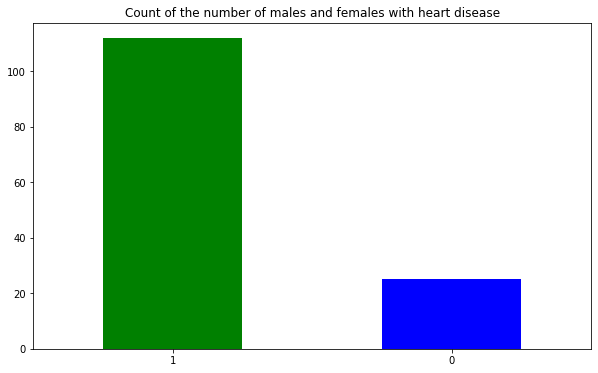

In [10]:
df.SEX[df.NUM==1].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the number of males and females with heart disease")
plt.xticks(rotation=0);

In [11]:
pd.crosstab(df.NUM,df.SEX)

SEX   0    1
NUM         
0    71   89
1    25  112

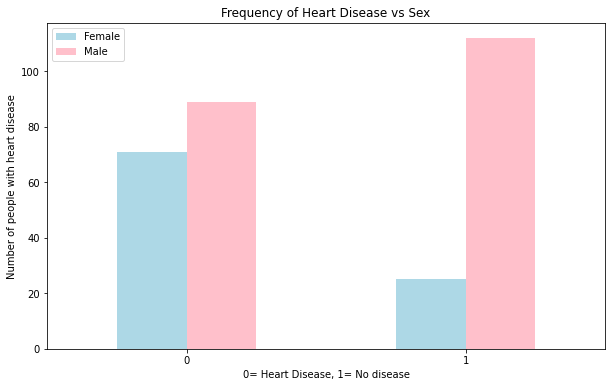

In [12]:
pd.crosstab(df.NUM,df.SEX).plot(kind='bar',figsize=(10,6),color=["lightblue","pink"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0= Heart Disease, 1= No disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## **Building a Correlation Matrix**

In [13]:
df.corr()

AGE       SEX        CP  TRESTBPS      CHOL       FBS  \
AGE       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
SEX      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
CP        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
TRESTBPS  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
CHOL      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
FBS       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
RESTECG   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
THALACH  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
EXANG     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
OLDPEAK   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
SLOPE     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
CA        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
THAL      0.126586  0.383652  0.268500  0.138183  0.010859  0.062209   
NUM       0.227075  0.278467  0.408945  0.153490  0.080285  0.003167   

           RESTECG   THALACH     EXANG   OLDPEAK     SLOPE        CA  \
AGE       0.149917 -0.394563  0.096489  0.197123  0.159405  0.362210   
SEX       0.033897 -0.060496  0.143581  0.106567  0.033345  0.091925   
CP        0.063905 -0.339308  0.377525  0.203244  0.151079  0.235644   
TRESTBPS  0.149242 -0.049108  0.066691  0.191243  0.121172  0.097954   
CHOL      0.165046 -0.000075  0.059339  0.038596 -0.009215  0.115945   
FBS       0.068831 -0.007842 -0.000893  0.008311  0.047819  0.152086   
RESTECG   1.000000 -0.072290  0.081874  0.113726  0.135141  0.129021   
THALACH  -0.072290  1.000000 -0.384368 -0.347640 -0.389307 -0.268727   
EXANG     0.081874 -0.384368  1.000000  0.289310  0.250572  0.148232   
OLDPEAK   0.113726 -0.347640  0.289310  1.000000  0.579037  0.294452   
SLOPE     0.135141 -0.389307  0.250572  0.579037  1.000000  0.109761   
CA        0.129021 -0.268727  0.148232  0.294452  0.109761  1.000000   
THAL      0.018795 -0.274831  0.326927  0.344976  0.279688  0.256382   
NUM       0.166343 -0.423817  0.421355  0.424052  0.333049  0.463189   

              THAL       NUM  
AGE       0.126586  0.227075  
SEX       0.383652  0.278467  
CP        0.268500  0.408945  
TRESTBPS  0.138183  0.153490  
CHOL      0.010859  0.080285  
FBS       0.062209  0.003167  
RESTECG   0.018795  0.166343  
THALACH  -0.274831 -0.423817  
EXANG     0.326927  0.421355  
OLDPEAK   0.344976  0.424052  
SLOPE     0.279688  0.333049  
CA        0.256382  0.463189  
THAL      1.000000  0.526640  
NUM       0.526640  1.000000

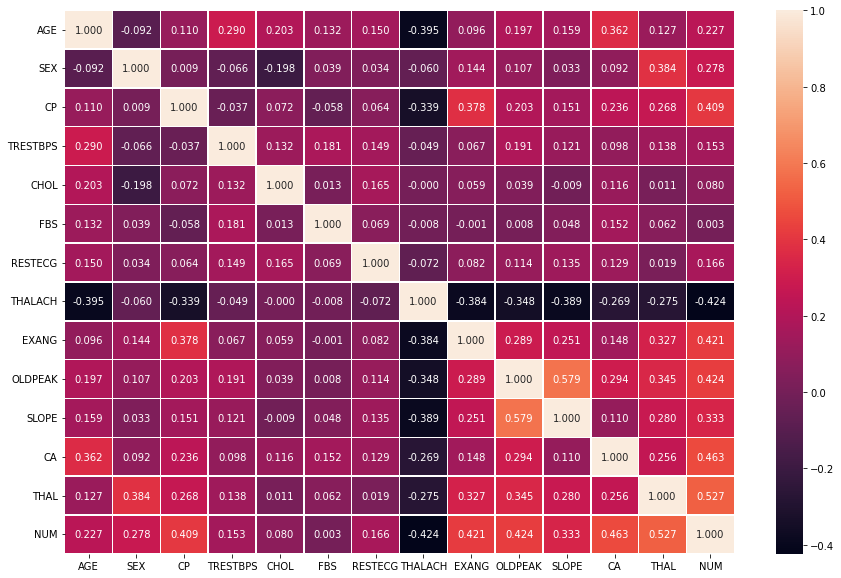

In [14]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")


In [15]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['AGE', 	'SEX', 	'CP', 'TRESTBPS', 'CHOL', 	'FBS', 	'RESTECG', 	'THALACH' ,	'EXANG', 	'OLDPEAK' ,	'SLOPE', 	'CA', 'THAL']
df[feat] = scal.fit_transform(df[feat])
df.head()

AGE  SEX        CP  TRESTBPS      CHOL  FBS  RESTECG   THALACH  EXANG  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    OLDPEAK  SLOPE        CA  THAL  NUM  
0  0.370968    1.0  0.000000  0.75    0  
1  0.241935    0.5  1.000000  0.00    1  
2  0.419355    0.5  0.666667  1.00    1  
3  0.564516    1.0  0.000000  0.00    0  
4  0.225806    0.0  0.000000  0.00    0

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features= ['AGE', 'TRESTBPS', 'CHOL', 'THALACH', 'OLDPEAK']
#df[features] = scaler.fit_transform(df[features])
df.head()

AGE  SEX        CP  TRESTBPS      CHOL  FBS  RESTECG   THALACH  EXANG  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    OLDPEAK  SLOPE        CA  THAL  NUM  
0  0.370968    1.0  0.000000  0.75    0  
1  0.241935    0.5  1.000000  0.00    1  
2  0.419355    0.5  0.666667  1.00    1  
3  0.564516    1.0  0.000000  0.00    0  
4  0.225806    0.0  0.000000  0.00    0

## **Creating Features and Target variable**

In [17]:
X=df.drop("NUM",axis=1).values
Y=df.NUM.values

## **Splitting the data into train and test sets**

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

## **Create a function for evaluating metrics**

In [19]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
  acc=accuracy_score(Y_test,Y_pred)
  rcl=recall_score(Y_test,Y_pred)
  f1=f1_score(Y_test,Y_pred)
 

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               
              }

  return print(metric_dict)

#evaluation(Y_test,SVC_Y_pred)

## **Fitting and Comparing different Models**

In [20]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier()
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
#print(Knn_score)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.783, 'recall': 0.7, 'F1 score': 0.764}


In [21]:
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
LR_clf=LogisticRegression()
LR_clf.fit(X_train,Y_train)
LR_Y_pred=LR_clf.predict(X_test)
LR_score=LR_clf.score(X_test,Y_test)
#print(LR_score)
evaluation(Y_test,LR_Y_pred)

{'accuracy': 0.833, 'recall': 0.733, 'F1 score': 0.815}


In [22]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
RF_clf=RandomForestClassifier(n_estimators=450)
RF_clf.fit(X_train,Y_train)
RF_score=RF_clf.score(X_test,Y_test)
RF_Y_pred=RF_clf.predict(X_test)
#print(RF_score)
evaluation(Y_test,RF_Y_pred)

{'accuracy': 0.767, 'recall': 0.7, 'F1 score': 0.75}


In [23]:
np.random.seed(42)
from sklearn.svm import SVC
SVC_clf=SVC()
SVC_clf.fit(X_train,Y_train)
SVC_score=SVC_clf.score(X_test,Y_test)
SVC_Y_pred=SVC_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,SVC_Y_pred)

{'accuracy': 0.8, 'recall': 0.7, 'F1 score': 0.778}


In [24]:
from xgboost import XGBClassifier
XGB_clf=XGBClassifier()
XGB_clf.fit(X_train,Y_train)
XGB_score=XGB_clf.score(X_test,Y_test)
XGB_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,XGB_Y_pred)

{'accuracy': 0.767, 'recall': 0.8, 'F1 score': 0.774}


In [25]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine',"XGBoost"], 'Accuracy': [LR_score*100,
                    RF_score*100,Knn_score*100,SVC_score*100,XGB_score*100]})
model_comp

Model   Accuracy
0     Logistic Regression  83.333333
1           Random Forest  76.666667
2     K-Nearest Neighbour  78.333333
3  Support Vector Machine  80.000000
4                 XGBoost  76.666667

## **Tuning KNN**

In [26]:
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    print(f"Accuracy with {i} no. of neighbors: {knn.fit(X_train, Y_train).score(X_test,Y_test)}%")

Accuracy with 1 no. of neighbors: 0.7%
Accuracy with 2 no. of neighbors: 0.6666666666666666%
Accuracy with 3 no. of neighbors: 0.7333333333333333%
Accuracy with 4 no. of neighbors: 0.7166666666666667%
Accuracy with 5 no. of neighbors: 0.7833333333333333%
Accuracy with 6 no. of neighbors: 0.7333333333333333%
Accuracy with 7 no. of neighbors: 0.7666666666666667%
Accuracy with 8 no. of neighbors: 0.7666666666666667%
Accuracy with 9 no. of neighbors: 0.7833333333333333%
Accuracy with 10 no. of neighbors: 0.7666666666666667%
Accuracy with 11 no. of neighbors: 0.8%
Accuracy with 12 no. of neighbors: 0.8%
Accuracy with 13 no. of neighbors: 0.8%
Accuracy with 14 no. of neighbors: 0.8%
Accuracy with 15 no. of neighbors: 0.8333333333333334%
Accuracy with 16 no. of neighbors: 0.8333333333333334%
Accuracy with 17 no. of neighbors: 0.8333333333333334%
Accuracy with 18 no. of neighbors: 0.8166666666666667%
Accuracy with 19 no. of neighbors: 0.8166666666666667%
Accuracy with 20 no. of neighbors: 0.81

In [27]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier(n_neighbors=7)
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.767, 'recall': 0.667, 'F1 score': 0.741}


# **Tuning Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
for i in range(1,40,1):
  print(f"With {i*10} estimators:")
  clf2=RandomForestClassifier(n_estimators=i*10,max_depth=i,random_state=i).fit(X_train,Y_train)
  print(f"Accuracy: {clf2.score(X_test,Y_test)*100:2f}%")

With 10 estimators:
Accuracy: 78.333333%
With 20 estimators:
Accuracy: 78.333333%
With 30 estimators:
Accuracy: 80.000000%
With 40 estimators:
Accuracy: 83.333333%
With 50 estimators:
Accuracy: 80.000000%
With 60 estimators:
Accuracy: 81.666667%
With 70 estimators:
Accuracy: 80.000000%
With 80 estimators:
Accuracy: 83.333333%
With 90 estimators:
Accuracy: 81.666667%
With 100 estimators:
Accuracy: 78.333333%
With 110 estimators:
Accuracy: 76.666667%
With 120 estimators:
Accuracy: 76.666667%
With 130 estimators:
Accuracy: 78.333333%
With 140 estimators:
Accuracy: 78.333333%
With 150 estimators:
Accuracy: 80.000000%
With 160 estimators:
Accuracy: 76.666667%
With 170 estimators:
Accuracy: 78.333333%
With 180 estimators:
Accuracy: 78.333333%
With 190 estimators:
Accuracy: 78.333333%
With 200 estimators:
Accuracy: 78.333333%
With 210 estimators:
Accuracy: 76.666667%
With 220 estimators:
Accuracy: 80.000000%
With 230 estimators:
Accuracy: 76.666667%
With 240 estimators:
Accuracy: 80.000000%
W

In [29]:
from sklearn.ensemble import RandomForestClassifier
RF_clf2=RandomForestClassifier(n_estimators=30,max_depth=3,random_state=3)
RF_clf2.fit(X_train,Y_train)
RF2_acc_score=RF_clf2.score(X_test,Y_test)
RF2_Y_pred=RF_clf2.predict(X_test)
#print(RF2_acc_score)
evaluation(Y_test,RF2_Y_pred)

{'accuracy': 0.8, 'recall': 0.7, 'F1 score': 0.778}


# **Tuning XGBoost manually**

In [30]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

xgb.fit(X_train,Y_train)
xgb_score=XGB_clf.score(X_test,Y_test)
xgb_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,xgb_Y_pred)

{'accuracy': 0.767, 'recall': 0.8, 'F1 score': 0.774}


# **Hyper parameter tuning  SVC using GridSearchCV**

In [31]:

from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1,2, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
gs_clf = GridSearchCV(SVC(), param_grid,cv=5, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gs_clf.fit(X_train, Y_train)

print(gs_clf.best_params_)

print(f"Accuracy score:{gs_clf.score(X_test,Y_test)}%")



Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.766 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.723 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.896 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.723 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

# **Hyper parameter tuning KNN using GridSearchCV**

In [32]:
knn_grid={'n_neighbors': np.arange(1,30,1),
          'leaf_size': np.arange(1,50,1)}

gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid,cv=5,verbose=True)

gs_knn.fit(X_train, Y_train)

gs_knn.best_params_

print(f"Accuracy score:{gs_knn.score(X_test,Y_test)*100}%")

Fitting 5 folds for each of 1421 candidates, totalling 7105 fits
Accuracy score:85.0%


In [33]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost'], 'Accuracy': [LR_score*100,
                    RF2_acc_score*100,Knn_score*100,SVC_score*100, XGB_score*100]})
model_comp

Model   Accuracy
0     Logistic Regression  83.333333
1           Random Forest  80.000000
2     K-Nearest Neighbour  76.666667
3  Support Vector Machine  80.000000
4  Extreme Gradient Boost  76.666667

# **Trying StackingCV Classifier**

In [34]:
!pip install mlrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[xgb,Knn_clf,RF_clf2],meta_classifier= Knn_clf)
scv.fit(X_train,Y_train)
scv_score=scv.score(X_test,Y_test)
scv_Y_pred=scv.predict(X_test)
#print(SVC_score)
evaluation(Y_test,scv_Y_pred)

{'accuracy': 0.8, 'recall': 0.7, 'F1 score': 0.778}


In [36]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost', 'StackingCV Classifier'], 'Accuracy': [LR_score*100,
                    RF2_acc_score*100,Knn_score*100,SVC_score*100, XGB_score*100, scv_score*100]})
model_comp

Model   Accuracy
0     Logistic Regression  83.333333
1           Random Forest  80.000000
2     K-Nearest Neighbour  76.666667
3  Support Vector Machine  80.000000
4  Extreme Gradient Boost  76.666667
5   StackingCV Classifier  80.000000

# **Looking at the evaluation metrics for our best model**

As we can see, the StackingCV Classifier gives us an accuracy of 92%. 

Let us evaluate the model now.

In [37]:
print(" Best evaluation parameters achieved with KNN:") 
evaluation(Y_test,scv_Y_pred)

 Best evaluation parameters achieved with KNN:
{'accuracy': 0.8, 'recall': 0.7, 'F1 score': 0.778}


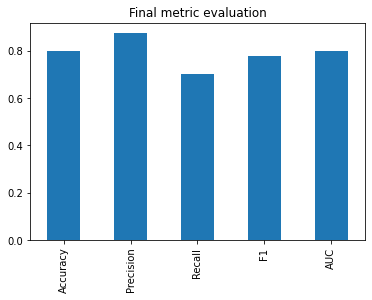

In [38]:
final_metrics={'Accuracy': scv.score(X_test,Y_test),
                   'Precision': precision_score(Y_test,scv_Y_pred),
                   'Recall': recall_score(Y_test,scv_Y_pred),
                   'F1': f1_score(Y_test,scv_Y_pred),
                   'AUC': roc_auc_score(Y_test,scv_Y_pred)}

metrics=pd.DataFrame(final_metrics,index=[0])

metrics.T.plot.bar(title='Final metric evaluation',legend=False);

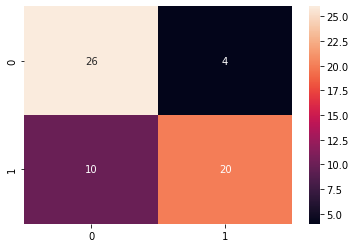

In [39]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,Knn_Y_pred),annot=True,cbar=True);

In [40]:
user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scal.transform(user_input)
scv_Y_pred=scv.predict(user_input)
if(scv_Y_pred[0]==0):
  print("Warning! You have chances of getting a heart disease!")
else:
  print("You are healthy and are less likely to get a heart disease!")


KeyboardInterrupt: ignored


# **Let's save our model using pickle**

In [41]:
import pickle as pkl
pkl.dump(scv,open("final_model.p","wb"))

In [42]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

1.0.2


# **Import streamlit,pyngrok, and ngrok modules**

In [43]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 17.6 MB/s 
     |████████████████████████████████| 235 kB 17.6 MB/s 
     |████████████████████████████████| 111 kB 21.3 MB/s 
     |████████████████████████████████| 78 kB 1.7 MB/s 
     |████████████████████████████████| 4.3 MB 39.3 MB/s 
     |████████████████████████████████| 164 kB 34.9 MB/s 
     |████████████████████████████████| 181 kB 37.1 MB/s 
     |████████████████████████████████| 63 kB 584 kB/s 
     |████████████████████████████████| 132 kB 17.9 MB/s 
     |████████████████████████████████| 132 kB 38.3 MB/s 
     |████████████████████████████████| 793 kB 11.2 MB/s 
     |████████████████████████████████| 423 kB 6.5 MB/s 
     |████████████████████████████████| 381 kB 45.9 MB/s 
     |████████████████████████████████| 51 kB 6.3 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=277bf940268

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15983 sha256=daa07f9323f506b4199b1b9ae8f059f4f4d8e6b0edc8d7a9b38dc860966083d6
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


In [45]:
%%writefile healthy-heart-app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
#Load the saved model
model=pkl.load(open("final_model.p","rb"))





st.set_page_config(page_title="Healthy Heart App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")



def preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal ):   
 
    
    # Pre-processing user input   
    if sex=="male":
        sex=1 
    else: sex=0
    
    
    if cp=="Typical angina":
        cp=0
    elif cp=="Atypical angina":
        cp=1
    elif cp=="Non-anginal pain":
        cp=2
    elif cp=="Asymptomatic":
        cp=2
    
    if exang=="Yes":
        exang=1
    elif exang=="No":
        exang=0
 
    if fbs=="Yes":
        fbs=1
    elif fbs=="No":
        fbs=0
 
    if slope=="Upsloping: better heart rate with excercise(uncommon)":
        slope=0
    elif slope=="Flatsloping: minimal change(typical healthy heart)":
          slope=1
    elif slope=="Downsloping: signs of unhealthy heart":
        slope=2  
 
    if thal=="fixed defect: used to be defect but ok now":
        thal=6
    elif thal=="reversable defect: no proper blood movement when excercising":
        thal=7
    elif thal=="normal":
        thal=2.31

    if restecg=="Nothing to note":
        restecg=0
    elif restecg=="ST-T Wave abnormality":
        restecg=1
    elif restecg=="Possible or definite left ventricular hypertrophy":
        restecg=2


    user_input=[age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction

    

       
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Healthy Heart App</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by TARUN ')
      
# following lines create boxes in which user can enter data required to make prediction
age=st.selectbox ("Age",range(1,121,1))
sex = st.radio("Select Gender: ", ('male', 'female'))
cp = st.selectbox('Chest Pain Type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic")) 
trestbps=st.selectbox('Resting Blood Sugar',range(1,500,1))
restecg=st.selectbox('Resting Electrocardiographic Results',("Nothing to note","ST-T Wave abnormality","Possible or definite left ventricular hypertrophy"))
chol=st.selectbox('Serum Cholestoral in mg/dl',range(1,1000,1))
fbs=st.radio("Fasting Blood Sugar higher than 120 mg/dl", ['Yes','No'])
thalach=st.selectbox('Maximum Heart Rate Achieved',range(1,300,1))
exang=st.selectbox('Exercise Induced Angina',["Yes","No"])
oldpeak=st.number_input('Oldpeak')
slope = st.selectbox('Heart Rate Slope',("Upsloping: better heart rate with excercise(uncommon)","Flatsloping: minimal change(typical healthy heart)","Downsloping: signs of unhealthy heart"))
ca=st.selectbox('Number of Major Vessels Colored by Flourosopy',range(0,5,1))
thal=st.selectbox('Thalium Stress Result',range(1,8,1))



#user_input=preprocess(sex,cp,exang, fbs, slope, thal )
pred=preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal)




if st.button("Predict"):    
  if pred[0] == 0:
    st.error('Warning! You have high risk of getting a heart attack!')
    
  else:
    st.success('You have lower risk of getting a heart disease!')
    
   



st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether you are at a risk of developing a heart disease.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a healthy heart")
st.sidebar.info("Don't forget to rate this app")



feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=5,step=1)

if feedback:
  st.header("Thank you for rating the app!")
  st.info("Caution: This is just a prediction and not doctoral advice. Kindly see a doctor if you feel the symptoms persist.") 


     













Overwriting healthy-heart-app.py


In [46]:
!nohup streamlit run healthy-heart-app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://8771-35-221-1-134.ngrok.io'